## 1. Import all the libraries and modules required:

In [1]:
# Import necessary libraries
from keras.optimizers import adam
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

## 2. Image Data Generation/Augmentation:

In [2]:
# Open 'train.zip' in read ('r') mode using the zipfile module
# and create a context manager using the 'with' statement.
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    
    # Extract all contents of 'train.zip' into the 'extracted_folder'.
    zip_ref.extractall('extracted_folder')

# Open 'test.zip' in read ('r') mode using the zipfile module
# and create a context manager using the 'with' statement.
with zipfile.ZipFile('test.zip', 'r') as zip_ref:
    
    # Extract all contents of 'test.zip' into the 'extracted_folder2'.
    zip_ref.extractall('extracted_folder2')

In [3]:
# Specify the directory containing the training images.
TRAINING_DIR = "extracted_folder/train"

# Create an ImageDataGenerator for data augmentation during training.
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator that reads images from the specified training directory,
# applies the defined data augmentation transformations, and rescales pixel values.
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=10,
    target_size=(150, 150)
)

# Specify the directory containing the validation images.
VALIDATION_DIR = "extracted_folder2/test"

# Create an ImageDataGenerator for validation data without data augmentation.
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Create a generator for validation data that reads images from the specified directory
# and rescales pixel values.
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=10,
    target_size=(150, 150)
)

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


## 3. Build Model:

In [16]:
# Define a Sequential model.
model = Sequential([
    
    # Convolutional layer with 100 filters, a 3x3 kernel, 'relu' activation function,
    # and input shape of (150, 150, 3) representing image dimensions.
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    
    # Max pooling layer with a 2x2 pool size.
    MaxPooling2D(2,2),
    
    # Convolutional layer with 100 filters, a 3x3 kernel, and 'relu' activation function.
    Conv2D(100, (3,3), activation='relu'),
    
    # Max pooling layer with a 2x2 pool size.
    MaxPooling2D(2,2),
    
    # Flatten layer to convert 2D feature maps to a 1D feature vector.
    Flatten(),
    
    # Dropout layer with a dropout rate of 0.5 to prevent overfitting.
    Dropout(0.5),
    
    # Fully connected layer with 50 neurons and 'relu' activation function.
    Dense(50, activation='relu'),
    
    # Output layer with 2 neurons (binary classification) and 'softmax' activation function.
    Dense(2, activation='softmax')
])
model.summary()
# Compile the model with the Adam optimizer, binary crossentropy loss function,
# and accuracy as the evaluation metric.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 100)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 100)       90100     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 129600)            0         
                                                                 
 dropout_2 (Dropout)         (None, 129600)           

## 4. Initialize a callback checkpoint to keep saving best model after each epoch while training:

In [5]:
# ModelCheckpoint callback to save the model weights during training.
# The saved model files will have names like 'model2-{epoch:03d}.model',
# where {epoch:03d} is replaced by the epoch number during training.

checkpoint = ModelCheckpoint(
    'model2-{epoch:03d}.model',  # File name pattern for saved models
    monitor='val_loss',           # Quantity to monitor (validation loss in this case)
    verbose=0,                    # Verbosity mode (0: silent, 1: progress bar)
    save_best_only=True,          # Save only the best model based on the monitored quantity
    mode='auto'                   # Mode for deciding the best model ('auto': automatically determined)
)

## 5. Train the model:

In [6]:
# Train the model using the fit_generator method.

history = model.fit_generator(
    train_generator,             # Training data generator
    epochs=50,                   # Number of training epochs
    validation_data=validation_generator,  # Validation data generator
    callbacks=[checkpoint]       # List of callbacks to be applied during training
)

C:\Users\asall\AppData\Local\Temp\ipykernel_3984\2234839544.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
132/132 [==============================] - ETA: 0s - loss: 0.7020 - acc: 0.5186

INFO:tensorflow:Assets written to: model2-001.model\assets


INFO:tensorflow:Assets written to: model2-001.model\assets


132/132 [==============================] - 89s 655ms/step - loss: 0.7020 - acc: 0.5186 - val_loss: 0.6928 - val_acc: 0.5103
Epoch 2/50
132/132 [==============================] - ETA: 0s - loss: 0.6865 - acc: 0.5506

INFO:tensorflow:Assets written to: model2-002.model\assets


INFO:tensorflow:Assets written to: model2-002.model\assets


132/132 [==============================] - 65s 489ms/step - loss: 0.6865 - acc: 0.5506 - val_loss: 0.4485 - val_acc: 0.8660
Epoch 3/50
132/132 [==============================] - 69s 518ms/step - loss: 0.6636 - acc: 0.6471 - val_loss: 0.5124 - val_acc: 0.8144
Epoch 4/50
132/132 [==============================] - ETA: 0s - loss: 0.4733 - acc: 0.8068

INFO:tensorflow:Assets written to: model2-004.model\assets


INFO:tensorflow:Assets written to: model2-004.model\assets


132/132 [==============================] - 67s 507ms/step - loss: 0.4733 - acc: 0.8068 - val_loss: 0.1259 - val_acc: 0.9639
Epoch 5/50
132/132 [==============================] - 74s 559ms/step - loss: 0.3822 - acc: 0.8730 - val_loss: 0.2054 - val_acc: 0.9072
Epoch 6/50
132/132 [==============================] - 65s 491ms/step - loss: 0.2790 - acc: 0.8928 - val_loss: 0.1809 - val_acc: 0.9227
Epoch 7/50
132/132 [==============================] - ETA: 0s - loss: 0.2714 - acc: 0.9027

INFO:tensorflow:Assets written to: model2-007.model\assets


INFO:tensorflow:Assets written to: model2-007.model\assets


132/132 [==============================] - 70s 530ms/step - loss: 0.2714 - acc: 0.9027 - val_loss: 0.0819 - val_acc: 0.9794
Epoch 8/50
132/132 [==============================] - 62s 467ms/step - loss: 0.2741 - acc: 0.9125 - val_loss: 0.1076 - val_acc: 0.9691
Epoch 9/50
132/132 [==============================] - ETA: 0s - loss: 0.2377 - acc: 0.9163

INFO:tensorflow:Assets written to: model2-009.model\assets


INFO:tensorflow:Assets written to: model2-009.model\assets


132/132 [==============================] - 65s 491ms/step - loss: 0.2377 - acc: 0.9163 - val_loss: 0.0638 - val_acc: 0.9742
Epoch 10/50
132/132 [==============================] - ETA: 0s - loss: 0.2389 - acc: 0.9179

INFO:tensorflow:Assets written to: model2-010.model\assets


INFO:tensorflow:Assets written to: model2-010.model\assets


132/132 [==============================] - 66s 499ms/step - loss: 0.2389 - acc: 0.9179 - val_loss: 0.0477 - val_acc: 0.9845
Epoch 11/50
132/132 [==============================] - 69s 521ms/step - loss: 0.1939 - acc: 0.9300 - val_loss: 0.0487 - val_acc: 0.9948
Epoch 12/50
132/132 [==============================] - 63s 474ms/step - loss: 0.2214 - acc: 0.9224 - val_loss: 0.0630 - val_acc: 0.9845
Epoch 13/50
132/132 [==============================] - ETA: 0s - loss: 0.1827 - acc: 0.9247

INFO:tensorflow:Assets written to: model2-013.model\assets


INFO:tensorflow:Assets written to: model2-013.model\assets


132/132 [==============================] - 64s 485ms/step - loss: 0.1827 - acc: 0.9247 - val_loss: 0.0330 - val_acc: 0.9897
Epoch 14/50
132/132 [==============================] - 62s 467ms/step - loss: 0.2366 - acc: 0.9255 - val_loss: 0.1892 - val_acc: 0.9072
Epoch 15/50
132/132 [==============================] - 61s 464ms/step - loss: 0.2096 - acc: 0.9278 - val_loss: 0.0495 - val_acc: 0.9897
Epoch 16/50
132/132 [==============================] - 72s 543ms/step - loss: 0.1983 - acc: 0.9346 - val_loss: 0.0386 - val_acc: 0.9948
Epoch 17/50
132/132 [==============================] - 58s 437ms/step - loss: 0.1640 - acc: 0.9437 - val_loss: 0.0435 - val_acc: 0.9845
Epoch 18/50
132/132 [==============================] - ETA: 0s - loss: 0.1831 - acc: 0.9369

INFO:tensorflow:Assets written to: model2-018.model\assets


INFO:tensorflow:Assets written to: model2-018.model\assets


132/132 [==============================] - 59s 446ms/step - loss: 0.1831 - acc: 0.9369 - val_loss: 0.0217 - val_acc: 0.9948
Epoch 19/50
132/132 [==============================] - 62s 470ms/step - loss: 0.1677 - acc: 0.9346 - val_loss: 0.0227 - val_acc: 0.9897
Epoch 20/50
132/132 [==============================] - 58s 439ms/step - loss: 0.2075 - acc: 0.9217 - val_loss: 0.0513 - val_acc: 0.9794
Epoch 21/50
132/132 [==============================] - 61s 458ms/step - loss: 0.2187 - acc: 0.9163 - val_loss: 0.0973 - val_acc: 0.9536
Epoch 22/50
132/132 [==============================] - 61s 461ms/step - loss: 0.1579 - acc: 0.9475 - val_loss: 0.0394 - val_acc: 0.9794
Epoch 23/50
132/132 [==============================] - 61s 459ms/step - loss: 0.1576 - acc: 0.9392 - val_loss: 0.1009 - val_acc: 0.9588
Epoch 24/50
132/132 [==============================] - ETA: 0s - loss: 0.1627 - acc: 0.9384

INFO:tensorflow:Assets written to: model2-024.model\assets


INFO:tensorflow:Assets written to: model2-024.model\assets


132/132 [==============================] - 68s 512ms/step - loss: 0.1627 - acc: 0.9384 - val_loss: 0.0181 - val_acc: 1.0000
Epoch 25/50
132/132 [==============================] - 72s 545ms/step - loss: 0.1584 - acc: 0.9407 - val_loss: 0.0429 - val_acc: 0.9794
Epoch 26/50
132/132 [==============================] - 71s 540ms/step - loss: 0.1890 - acc: 0.9422 - val_loss: 0.0355 - val_acc: 0.9845
Epoch 27/50
132/132 [==============================] - 63s 473ms/step - loss: 0.1508 - acc: 0.9414 - val_loss: 0.0307 - val_acc: 0.9897
Epoch 28/50
132/132 [==============================] - 59s 447ms/step - loss: 0.1441 - acc: 0.9483 - val_loss: 0.0886 - val_acc: 0.9639
Epoch 29/50
132/132 [==============================] - 61s 458ms/step - loss: 0.1563 - acc: 0.9506 - val_loss: 0.0494 - val_acc: 0.9845
Epoch 30/50
132/132 [==============================] - 62s 465ms/step - loss: 0.1511 - acc: 0.9498 - val_loss: 0.1154 - val_acc: 0.9433
Epoch 31/50
132/132 [==============================] - 60s 4

INFO:tensorflow:Assets written to: model2-043.model\assets


INFO:tensorflow:Assets written to: model2-043.model\assets


132/132 [==============================] - 63s 476ms/step - loss: 0.1355 - acc: 0.9529 - val_loss: 0.0160 - val_acc: 0.9948
Epoch 44/50
132/132 [==============================] - 73s 551ms/step - loss: 0.1112 - acc: 0.9635 - val_loss: 0.0177 - val_acc: 0.9948
Epoch 45/50
132/132 [==============================] - 67s 503ms/step - loss: 0.1123 - acc: 0.9574 - val_loss: 0.0521 - val_acc: 0.9845
Epoch 46/50
132/132 [==============================] - 60s 452ms/step - loss: 0.1221 - acc: 0.9620 - val_loss: 0.0493 - val_acc: 0.9691
Epoch 47/50
132/132 [==============================] - 59s 449ms/step - loss: 0.0984 - acc: 0.9612 - val_loss: 0.0296 - val_acc: 0.9794
Epoch 48/50
132/132 [==============================] - 60s 451ms/step - loss: 0.1105 - acc: 0.9582 - val_loss: 0.0995 - val_acc: 0.9536
Epoch 49/50
132/132 [==============================] - ETA: 0s - loss: 0.1062 - acc: 0.9605

INFO:tensorflow:Assets written to: model2-049.model\assets


INFO:tensorflow:Assets written to: model2-049.model\assets


132/132 [==============================] - 59s 447ms/step - loss: 0.1062 - acc: 0.9605 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 50/50
132/132 [==============================] - 58s 440ms/step - loss: 0.1176 - acc: 0.9605 - val_loss: 0.0426 - val_acc: 0.9845


## 6. Model Evaluation

Legend


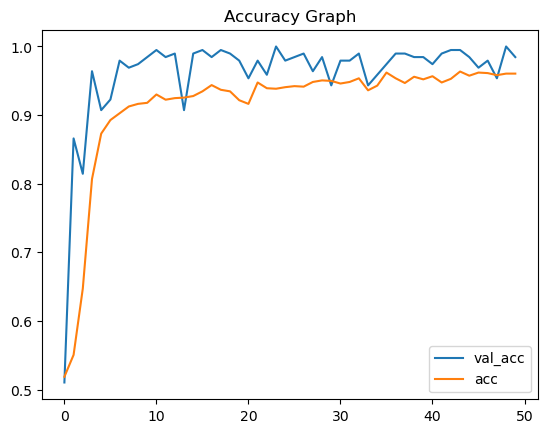

In [7]:
# Set the title of the plot.
plt.title("Accuracy Graph")

# Plot the validation accuracy over epochs.
plt.plot(history.history['val_acc'])

# Plot the training accuracy over epochs.
plt.plot(history.history['acc'])

# Add a legend to the plot indicating the lines' meaning.
print(plt.legend(['val_acc', 'acc']))

Legend


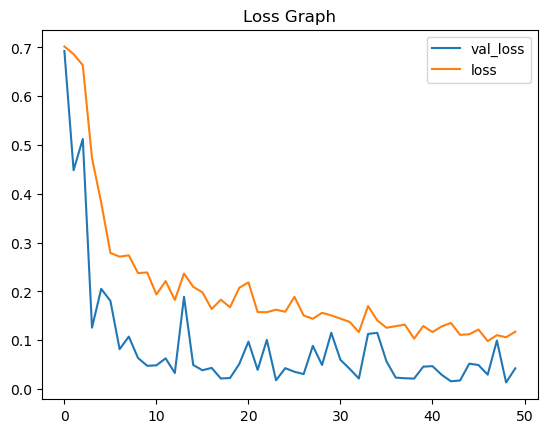

In [8]:
# Set the title of the plot.
plt.title("Loss Graph")

# Plot the validation loss over epochs.
plt.plot(history.history['val_loss'])

# Plot the training loss over epochs.
plt.plot(history.history['loss'])

# Add a legend to the plot indicating the lines' meaning.
print(plt.legend(['val_loss', 'loss']))

## Test model

In [9]:
# Import necessary libraries
from keras.models import load_model
import cv2
import numpy as np

# Load the pre-trained model for face mask detection
model = load_model("model2-040.model")

# Define labels and colors for visualization
results = {0: 'without mask', 1: 'mask'}
GR_dict = {0: (0, 0, 255), 1: (0, 255, 0)}

# Set the rectangle size for face detection
rect_size = 4

# Open a video capture stream (camera)
cap = cv2.VideoCapture(0)

# Load the Haar Cascade classifier for face detection
haarcascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

# Main loop for real-time face mask detection
while True:
    # Read a frame from the video capture stream
    (rval, im) = cap.read()
    
    # Flip the frame horizontally for a more natural viewing experience
    im = cv2.flip(im, 1, 1)

    # Resize the frame for faster face detection
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    
    # Detect faces in the resized frame
    faces = haarcascade.detectMultiScale(rerect_size)
    
    # Process each detected face
    for f in faces:
        # Scale the face coordinates back to the original frame size
        (x, y, w, h) = [v * rect_size for v in f]
        
        # Extract the face region from the frame
        face_img = im[y:y+h, x:x+w]
        
        # Resize and normalize the face image for model prediction
        rerect_sized = cv2.resize(face_img, (150, 150))
        normalized = rerect_sized / 255.0
        reshaped = np.reshape(normalized, (1, 150, 150, 3))
        reshaped = np.vstack([reshaped])
        
        # Make a prediction using the loaded model
        result = model.predict(reshaped)
        
        # Determine the predicted label and visualize the result
        label = np.argmax(result, axis=1)[0]
        cv2.rectangle(im, (x, y), (x+w, y+h), GR_dict[label], 2)
        cv2.rectangle(im, (x, y-40), (x+w, y), GR_dict[label], -1)
        cv2.putText(im, results[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    # Display the live video feed with face mask detection
    cv2.imshow('LIVE', im)
    
    # Check for the 'Esc' key to exit the loop
    key = cv2.waitKey(10)
    if key == 27:
        break

# Release the video capture stream and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step


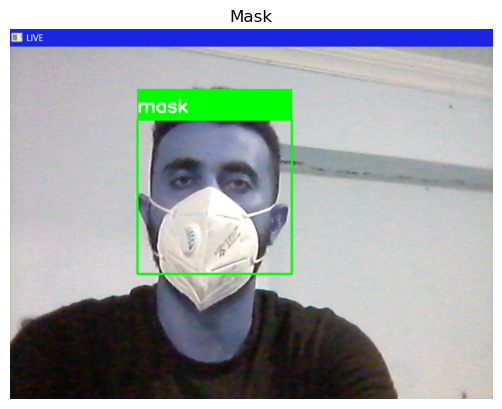

In [13]:
mask = cv2.imread("Mask.png")
plt.imshow(mask)
plt.title('Mask')
plt.axis('off')  # Turn off axis labels
plt.show()

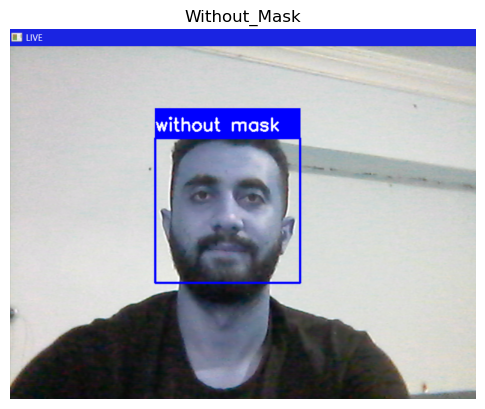

In [14]:
Without_Mask = cv2.imread("Without_Mask.png")
plt.imshow(Without_Mask)
plt.title('Without_Mask')
plt.axis('off')  # Turn off axis labels
plt.show()